In [ ]:
from IPython.display import display
import IPython
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sklearn as skl
%matplotlib notebook
%matplotlib inline
import tensorflow as tf
!pip install mglearn
import mglearn as mglearn


In [ ]:
!apt -qq -y install fonts-nanum
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.tt

In [ ]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['NanumGothic Eco'], 설정 폰트 사이즈: 10.0


w[0]: 0.393906  b: -0.031804


Text(0.5, 1.0, 'wave 데이터셋에 대한 선형 모델')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

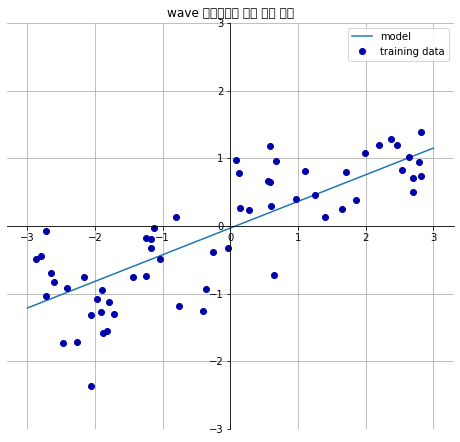

In [ ]:
mglearn.plots.plot_linear_regression_wave()
plt.title("wave 데이터셋에 대한 선형 모델")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_wave(n_samples=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

lr = LinearRegression().fit(X_train, y_train)


In [ ]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.43050654]
lr.intercept_: 0.05400343461517779


In [ ]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train))) #R-square 값임
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.66
테스트 세트 점수: 0.43


In [ ]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
lr = LinearRegression().fit(X_train, y_train)

In [ ]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.94
테스트 세트 점수: 0.85


In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)#기본 알파 값은 1임
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.88
테스트 세트 점수: 0.75


In [ ]:
alp=np.arange(1,20,0.5)
trn_acc = []
tst_acc = []
for a in alp:
  ridge = Ridge(alpha=a).fit(X_train, y_train)
  trn_acc.append(ridge.score(X_train, y_train))
  tst_acc.append(ridge.score(X_test, y_test))


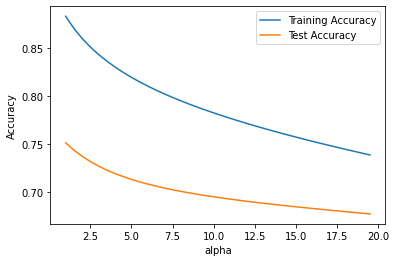

<Figure size 72000x72000 with 0 Axes>

In [ ]:
plt.plot(alp, trn_acc, label="Training Accuracy")
plt.plot(alp, tst_acc, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("alpha")
plt.legend(loc=1)
plt.figure(figsize=(1000,1000))
plt.show()

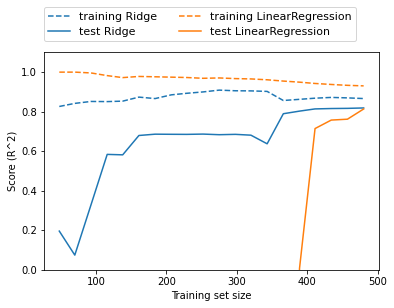

In [ ]:
mglearn.plots.plot_ridge_n_samples()

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01).fit(X_train, y_train)
print(lasso.coef_)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

[-1.57468069e+00  0.00000000e+00 -0.00000000e+00  2.27089921e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.85568596e+00
  4.31035093e+00  0.00000000e+00  0.00000000e+00  2.64858528e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -7.13802859e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  3.15692170e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  6.31280402e+00 -0.00000000e+00 -0.00000000e+00
 -1.65782501e+00  3.04884307e-01 -6.90769504e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.65606769e+00  1.19083275e+01
  5.88243539e-01  0.00000000e+00 -0.00000000e+00 -3.64445602e+00
 -0.00000000e+00 -0.00000

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.987840119640623, tolerance: 3.2637766279683382
  positive)


In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.72
사용한 특성의 개수: 30


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


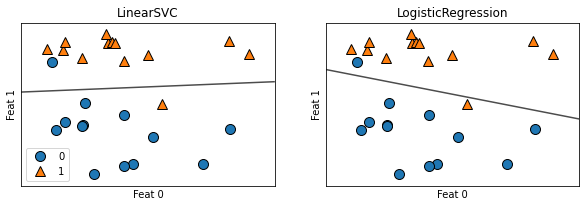

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feat 0")
    ax.set_ylabel("Feat 1")
axes[0].legend()

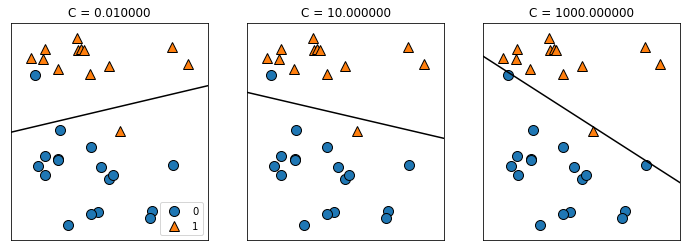

In [ ]:
mglearn.plots.plot_linear_svc_regularization()